In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import sys
print(sys.version)
import warnings

3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


# Questão 1

In [4]:
X = np.array((0,4,6,9))
Y = np.array((3.0,3.4))

dist = np.square(np.vstack((X-Y[0],X-Y[1])))
print('Distâncias euclidianas quadráticas entre os dados X e os centroides Y:')
print(dist)

Distâncias euclidianas quadráticas entre os dados X e os centroides Y:
[[  9.     1.     9.    36.  ]
 [ 11.56   0.36   6.76  31.36]]


### Item A

/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: Mean of empty slice.
/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/lucas.cinelli/miniconda3/envs/masters/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: Mean of empty slice.


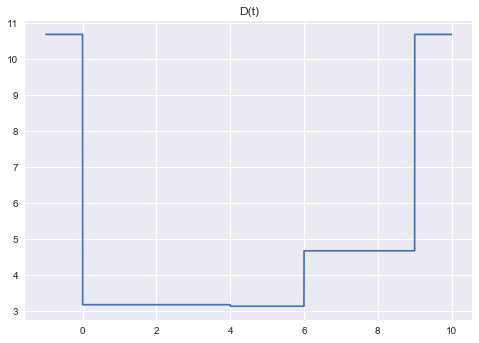

In [32]:
def calculateHardDist(X,t):
    cluster = np.zeros_like(X)
    centroid = np.zeros(2)
    cluster[X>t] = 1
    centroid[0] = X[cluster == 0].mean()
    centroid[1] = X[cluster == 1].mean()

    dists = np.concatenate((np.square(X[cluster == 0]-centroid[0]),np.square(X[cluster == 1]-centroid[1])))
    return dists.mean()

t = np.linspace(-1, 10, num=1e4)
dist = np.zeros_like(t)
for i in range(len(t)):
    dist[i] = calculateHardDist(X,t[i])
plt.plot(t,dist)
plt.title('D(t)')
plt.show()
# print(dist)

### Item B

In [47]:
def calculateConditionalProb(dist,T):
    probCond = np.exp(-dist/T)
    print('Fatores de boltzman:')
    print(probCond)
    print('\nFatores de normalização:')
    print(probCond.sum(0))
    probCond = (probCond/probCond.sum(0))
    print('\nProbabilidade condicional de y dado x P(y|x):')
    print(probCond)
    return probCond

P1xy = calculateConditionalProb(dist, 1.0)

Fatores de boltzman:
[[  1.23409804e-04   3.67879441e-01   1.23409804e-04   2.31952283e-16]
 [  9.54016287e-06   6.97676326e-01   1.15922917e-03   2.40173478e-14]]

Fatores de normalização:
[  1.32949967e-04   1.06555577e+00   1.28263898e-03   2.42493001e-14]

Probabilidade condicional de y dado x P(y|x):
[[ 0.92824246  0.34524654  0.09621554  0.00956532]
 [ 0.07175754  0.65475346  0.90378446  0.99043468]]


### Item C

In [48]:
def calculateMeanDist(probCond, dist):
    meanDist = (probCond*dist).sum()/4
    print('Distancia média para os centroides:')
    print(meanDist)
    return meanDist
 
calculateMeanDist(P1xy, dist);

Distancia média para os centroides:
12.0361407464


### Item D

In [56]:
def calculateCentroid(probCond,X):
    centroid = (probCond*X).sum(1)/probCond.sum(1)
    print('New centroid positions:')
    print(centroid)
    return centroid

calculateCentroid(P1xy, X);

New centroid positions:
[ 1.48220978  6.46981253]


### Item E

In [60]:
print('Para temp T=0.1:\n')
P2xy = calculateConditionalProb(dist, 0.1)
print()
calculateMeanDist(P2xy, dist);
print()
calculateCentroid(P2xy,X)

Para temp T=0.1:

Fatores de boltzman:
[[  8.19401262e-040   4.53999298e-005   8.19401262e-040   4.50802707e-157]
 [  6.24536596e-051   2.73237224e-002   4.38220836e-030   6.38631705e-137]]

Fatores de normalização:
[  8.19401262e-040   2.73691224e-002   4.38220836e-030   6.38631705e-137]

Probabilidade condicional de y dado x P(y|x):
[[  1.00000000e+00   1.65880108e-03   1.86983638e-10   7.05888391e-21]
 [  7.62186519e-12   9.98341199e-01   1.00000000e+00   1.00000000e+00]]

Distancia média para os centroides:
11.8702654083

New centroid positions:
[ 0.00662422  6.33462423]


array([ 0.00662422,  6.33462423])

### Item F

In [61]:
print('\n\nPara temp T=50\n')
P3xy = calculateConditionalProb(dist, 50.0)
print()
calculateMeanDist(P3xy,dist)
print()
calculateCentroid(P3xy,X);



Para temp T=50

Fatores de boltzman:
[[ 0.83527021  0.98019867  0.83527021  0.48675226]
 [ 0.79358073  0.99282586  0.87354119  0.53408515]]

Fatores de normalização:
[ 1.62885095  1.97302453  1.7088114   1.0208374 ]

Probabilidade condicional de y dado x P(y|x):
[[ 0.5127972   0.49680004  0.48880187  0.47681664]
 [ 0.4872028   0.50319996  0.51119813  0.52318336]]

Distancia média para os centroides:
13.0881341418

New centroid positions:
[ 4.66347086  4.83441083]


### Item G

Para temperaturas T mais altas, os centróides convergem para o mesmo pont: para T=50.0 (item F), a diferença entre ambos centróides é inferior à 4% e a matriz de probabilidades condicionais tende a 1/|centroides| (no caso de |centróides| = 2, Pyx = 0.5). 

Já para temperaturas T mais baixas, temos uma situação similar ao hard clustering com a matriz de probabilidades tendendo para zeros ou uns apenas, o que fica evidente no caso da temperatura T=0.1 (item E). 

Naturalmente, T=1.0 é um caso intermediário entre ambos T=50.0 e T=0.1.

# Questão 2

In [33]:
def energy(X):
    N = len(X)
#   Use the Rastrigin function
#   https://en.wikipedia.org/wiki/Rastrigin_function
#     return 10*N + np.sum(np.square(X) - 10*np.cos(2*np.pi*X))

#   Use the Ackley function
    return -20*np.exp(-0.2*np.sqrt(np.square(X).mean())) - np.exp(((np.cos(2*np.pi*X)).mean())) + np.exp(1) + 20

def cauchyPdf(k):
    # samples from standard cauchy distribution? x0=0 and gamma=1
    return np.random.standard_cauchy(k)

def decay(TO, k):
    return T0 / k

def makeCyclicMove(X,eps, lowerLimit, upperLimit, randomNumberGenerator):
    Xn = X + eps*randomNumberGenerator(len(X))*T
    Xn[Xn > upperLimit] = (Xn[Xn > upperLimit] - upperLimit) + lowerLimit
    Xn[Xn < lowerLimit] = (Xn[Xn < lowerLimit] - lowerLimit) + upperLimit
    return Xn   

dimProblem = 20 # dimension of the problem to be minimized : len(X)
N = int(1e4) # numero de iter por temperatura
K = 200 # numero de temps a ser usada
T = T0 = 1.5 # temp inicial
eps = 0.2 # tamanho max da perturbacao
n = 0
k = 1
end = False

# Xmin = X = X0 = np.random.randn(dimProblem)
Xmin = X = X0 = np.random.uniform(-32, 32, dimProblem)
Jmin = J = J0 = energy(X0)

print('X0 = ')
print(Xmin)
print('\nJ(X0) = {:1.5f}'.format(Jmin))
print()

while not end:
    n = n + 1
    Xn = makeCyclicMove(X,eps, -32, 32, cauchyPdf)
#     Xn = makeCyclicMove(X,eps, -5.12, 5.12, cauchyPdf)
    Jn = energy(Xn)
    if np.exp(-(Jn-J)/T) > np.random.rand(1):
        X = Xn
        J = Jn
    if Jn < Jmin:
        Xmin = Xn
        Jmin = Jn

    #linear cooling
    if n % N == 0:
        k = k + 1
        T = decay(T0, k)
        if k > K:
            end = True

print('Xmin = ')
print(Xmin)
print(Jmin)
# print('\nJ(Xmin) = {:1.5f}'.format(Jmin))

X0 = 
[-13.47129403 -23.01864638  25.39746356 -30.35374674  27.62589912
 -21.38895286 -25.94951918  -0.22625022 -19.82786029  13.21926013
  15.20423867   7.37245585   3.80376844  -5.76647112   3.47380581
 -26.12924104 -29.13736946   2.16726643  30.71670038  11.4235371 ]

J(X0) = 21.38699

Xmin = 
[-0.0062923  -0.00170533  0.01587081 -0.00319129  0.00363223  0.00569661
 -0.00915489  0.00347194  0.00406802 -0.0019419  -0.01253456  0.00307027
 -0.00187287  0.00012256 -0.00593526  0.0103228   0.01724678 -0.00154362
 -0.0157486  -0.00251835]
0.0361924343635


Apesar de não ter sido solicitado na questão, foi implementado o FSA com recozimento linear ao invés do convencional e seu decaimento logarítimico. Dessa vez também foi empregada uma função custo mais simples, a função de Ackley, cujos mínimos locais não são tão profundos e a topologia global consistindo de uma poço de energia mais acentuado em comparação à função de Rastrigin.

Apesar de não estar exibido aqui, o uso do FSA na função de Rastrigin de 20 dimensões obteve um resultado um pouco melhor do que através do CSA e em menos tempo também: J= 5.6 (em 20 dimensões) contra J = 6.4 (em 10 dimensões). 